# Case Study: How Does a Bike-Share Navigate Speedy Success?

#### Eric Chu

#### 2023-01-23

# Company

In 2016, Cyclistic launched a successful bike-share offering. Since
then, the program has grown to a fleet of 5,824 bicycles that are
geotracked and locked into a network of 692 stations across Chicago. The
bikes can be unlocked from one station and returned to any other station
in the system anytime. This is a hypothetical company made for this case
study.

#Stakeholders \* Cyclistic executive team: The notoriously
detail-oriented executive team will decide whether to approve the
recommended marketing program \* Lily Moreno: The director of marketing
and your manager. Moreno is responsible for the development of campaigns
and initiatives to promote the bike-share program. These may include
email, social media, and other channels.

# Marketing Design Team Objective

The director of marketing, Lily Moreno, has set a clear goal: Design
marketing strategies aimed at converting casual riders into annual
members. In order to do that, however, the marketing analyst team needs
to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect
their marketing tactics. Moreno and her team are interested in analyzing
the Cyclistic historical bike trip data to identify trends.

Three questions will guide the future marketing program: \* How do
annual members and casual riders use Cyclistic bikes differently? \* Why
would casual riders buy Cyclistic annual memberships? \* How can
Cyclistic use digital media to influence casual riders to become
members?

#Business Task The business task assigned to me is to analyze the data
cysclistic data from the last 12 months, cylcistic data from December
2021 - November 2022, to figure out the difference between annual
members and casual riders.

#Data Source Cyclistic’s historical trip data from the past 27 months is
accessible [link](https://divvy-tripdata.s3.amazonaws.com/index.html).
This is a public, open dataset provided by Motivate International
Inc. under the [Data License
Agreement](https://ride.divvybikes.com/data-license-agreement). Note
that the purchases in the data set are not linked to credit card
information to ensure privacy of users.

#Data Cleaning/Manipulation This will be all done within R Studio,
through the R language. The reason for this is because the R language
have many packages and tools that could be used for the cleaning,
manipulation, and visualization of the data.

Steps for the Data Cleaning Process: \*Gather the data within R Studio
and check its characteristics

``` r
data_2021_12 <- read.csv("202112-divvy-tripdata.csv")
```

``` r
data_2022_01 <- read.csv("202201-divvy-tripdata.csv")
```

``` r
data_2022_02 <- read.csv("202202-divvy-tripdata.csv")
```

``` r
data_2022_03 <- read.csv("202203-divvy-tripdata.csv")
```

``` r
data_2022_04 <- read.csv("202204-divvy-tripdata.csv")
```

``` r
data_2022_05 <- read.csv("202205-divvy-tripdata.csv")
```

``` r
data_2022_06 <- read.csv("202206-divvy-tripdata.csv")
```

``` r
data_2022_07 <- read.csv("202207-divvy-tripdata.csv")
```

``` r
data_2022_08 <- read.csv("202208-divvy-tripdata.csv")
```

``` r
data_2022_09 <- read.csv("202209-divvy-tripdata.csv")
```

``` r
data_2022_10 <- read.csv("202210-divvy-tripdata.csv")
```

``` r
data_2022_11 <- read.csv("202211-divvy-tripdata.csv") 
```

\*Then take all frame gathered data and stack them together into one
single data frame.

``` r
united_data <- bind_rows(data_2021_12, data_2022_01, data_2022_02, data_2022_03, data_2022_04, data_2022_05, data_2022_06, data_2022_07, data_2022_08, data_2022_09, data_2022_10, data_2022_11)
```

\*Check for NA values and remove them

``` r
united_data <- drop_na(united_data)
```

    ##
    *The data also lacks the data of day, month, and year. Which will be
    added as another column
    united_data["date"] <- as.Date(united_data$started_at)

``` r
united_data["month"] <- format(as.Date(united_data$date), "%m")
```

``` r
united_data["day"] <- format(as.Date(united_data$date), "%d")
```

``` r
united_data["year"] <- format(as.Date(united_data$date), "%Y")
```

``` r
united_data["day_of_the_week"] <- format(as.Date(united_data$date), "%A")
```

\*We need a calculated field for the length of ride called ride_length
and convert it to a numeric value

``` r
united_data["ride_length"] <- difftime(united_data$ended_at, united_data$started_at)
```

``` r
as.character(united_data$ride_length)
```

``` r
united_data$ride_length <- as.numeric(united_data$ride_length)
```

``` r
is.numeric(united_data$ride_length)
```

\*Check ride_length if it contains any negative value or HQ QR stations
and remove them cause they do not signify any attempted riding.

``` r
united_data["ride_length"] <- difftime(united_data$ended_at, united_data$started_at)
```

\*After cleaning is complete we export the full data for the analysis
portion.

``` r
final_united_data <- united_data[!(united_data$start_station_name == "HQ QR" | united_data$ride_length<0),]
```

#Data Analysis/Visualization In this part we would start with taking the
singular cleaned file and start the descriptive analysis by finding the
mean, median, and max of the ride_length value. This will give us a
better sense of the data layout:

``` r
mean(cyclist_data$ride_length)
```

``` r
median(cyclist_data$ride_length)
```

``` r
max(cyclist_data$ride_length)
```

``` r
min(cyclist_data$ride_length)
```

Then we will compare the ride_length between the Casual and Members with
in the data using the aggregate function finding their overall means,
median, min, and max of the casual and member individuals:

``` r
aggregate(cyclist_data$ride_length ~ cyclist_data$member_casual, FUN = mean)
```

``` r
aggregate(cyclist_data$ride_length ~ cyclist_data$member_casual, FUN = median)
```

``` r
aggregate(cyclist_data$ride_length ~ cyclist_data$member_casual, FUN = max)
```

``` r
aggregate(cyclist_data$ride_length ~ cyclist_data$member_casual, FUN = min)
```

In this we are comparing the different values between the members and
casual riders through the median, mean, max, and min values of the
ride_length. From this observation the mean and max value are massively
larger with the casual riders than the member riders. But the medians
are more close in value but the casual members still have the higher
value and they both share the same min value of 0.

Then we will check the average ride time by each day for members vs
casual users and we will also fix the order of the days of week because
they are out of order. Then I will run the average ride time by each day
for members vs casual users:

``` r
aggregate(cyclist_data$ride_length ~ cyclist_data$member_casual + cyclist_data$day_of_the_week, FUN = mean)
```

``` r
cyclist_data$day_of_week <- ordered(cyclist_data$day_of_the_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
```

``` r
aggregate(cyclist_data$ride_length ~ cyclist_data$member_casual + cyclist_data$day_of_the_week, FUN = mean)
```

Then we will analyze the ridership data by viewing it through its type
and weekday:

``` r
cyclist_data %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday)   
```

Through this analysis it further shows that on a daily basis throughout
the week, the casual riders have a longer average duration than the
member riders.

#Visualizing the Data Visualize the rides by rider types:

``` r
cyclist_data %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")
```

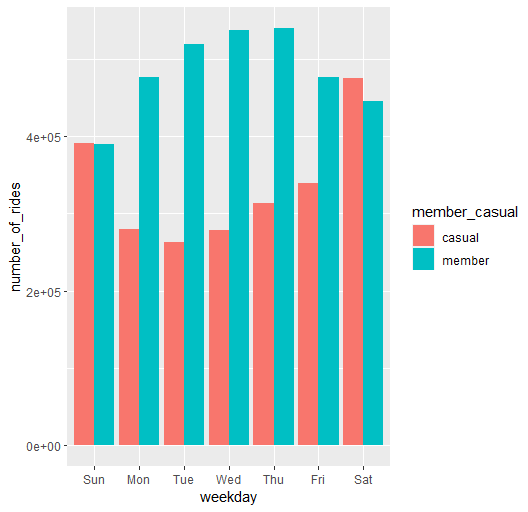

Through this visualization, it seems that throughout the week, the
member riders seem to have more number of rides than the casual riders
in this. Where number of rides is referencing the observable value
within this group of member/casual riders.

Then I will create a visualization for average ride length duration
throughout the week:

``` r
cyclist_data %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")
```

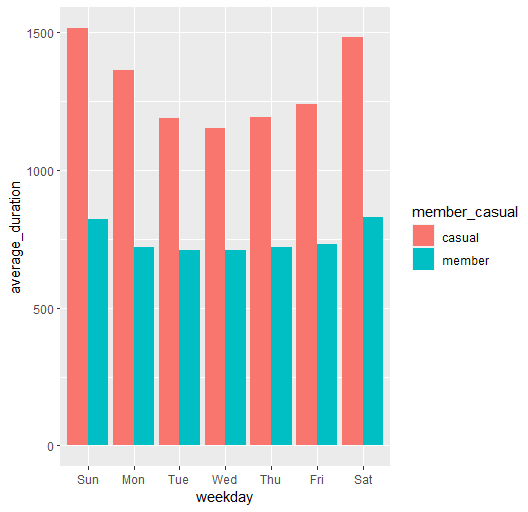

From this, we can see that the casual riders, while they have a smaller
amount of rides, have a larger average amount of ride length than the
member riders. Showing that the casual riders have done more riding that
the member riders regardless on the amount of rides have for both
groups.

Finally i will export a summary .csv file to take the results and
further visualization using the Tableau tool:

``` r
counts <- aggregate(cyclist_data$ride_length ~ cyclist_data$member_casual + cyclist_data$day_of_week, FUN = mean)
```

``` r
write.csv(counts, file = 'C:/Users/dexch/Documents/cyclist-data/avg_ride_length.csv')
```

Using Tableau to visualize the summary data gathered from the previous
step. I first observe the ride length of the casual and member riders
throughout the week and then throughout the year: 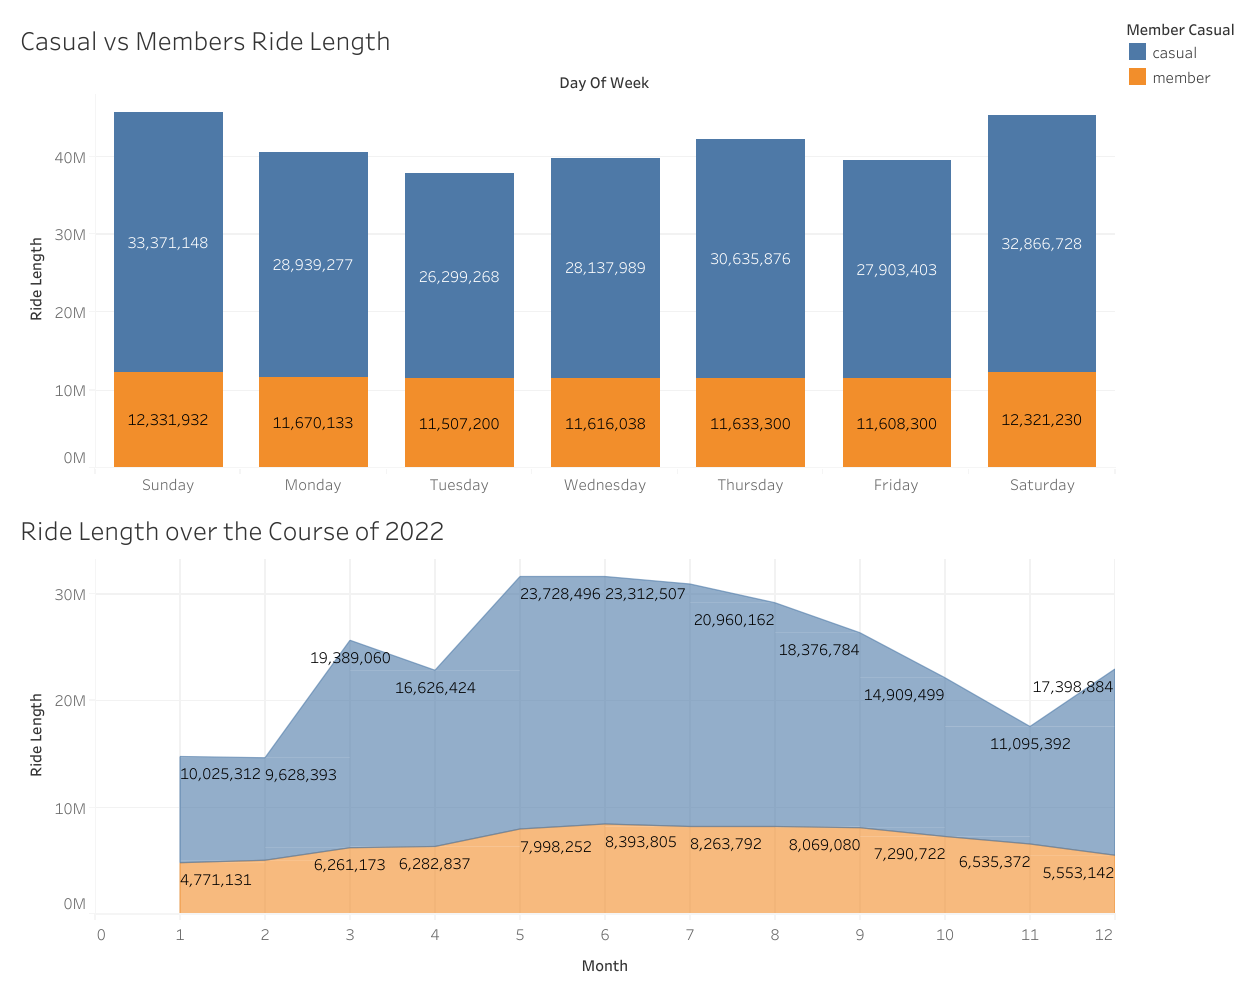
From this, the casual riders have a far greater riding distance than
those of the casual riders. Showing that the casual riders are far more
active than the member riders.

Thin I observe the different kinds of bikes the riders use and compare
what is being used more and what is being used less between the member
riders and the casual riders: 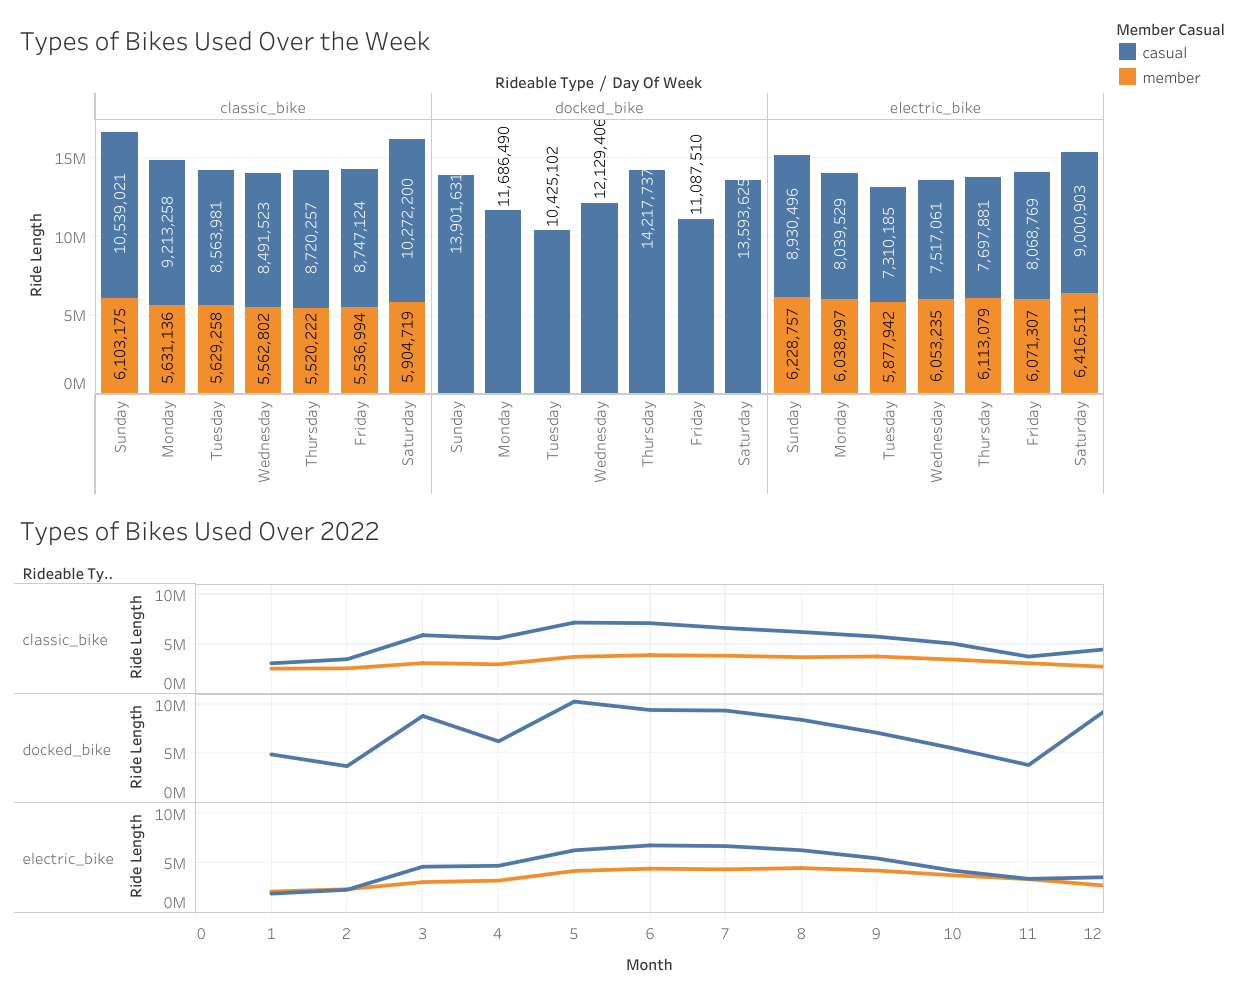
From this visualization, it seems that the type of bikes that are used
the most are the docked bikes and is the biggest factor to why the
casual riders have so much more usage of bikes than the member riders.
From this line graph we can tell that while there are still more usage
of bikes with the casual riders, there isn’t much notable changes
throughout the year.

Then there is a visualization for the top 10 station with the highest
riding lengths: 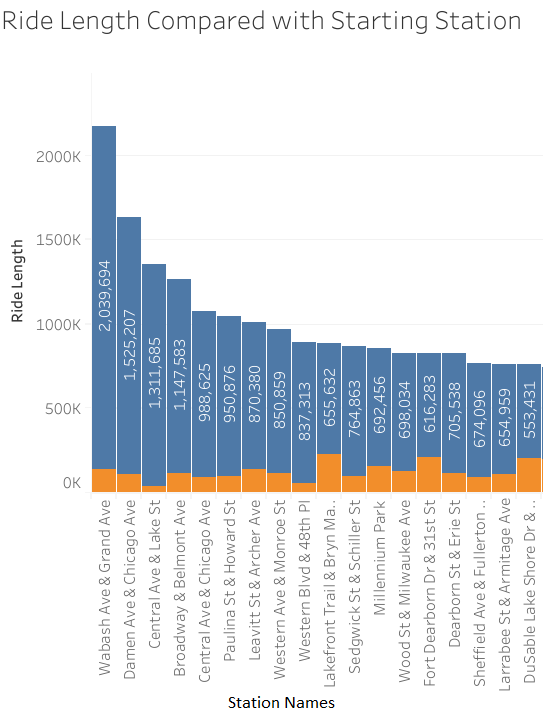

This visualization further shows that the casual riders make up the
majority of riders in the data but also shows that Wabash Ave & Grand
Ave is the starting station with the most riding distance.

#Data Conclusion Conclusion for the business task: How do annual members
and casual riders use Cyclistic bikes differently? *The key difference
between the casual and member riders is that the casual riders tend to
use more of the cyclistic bikes than the member riders.* The member
riders seems to only use the classic and electric bikes where they don’t
use the docked bikes *The casual riders get more riding distance closer
to the weekend while the member riders keep a close constant number of
distance throughout the entire week.* Members riders distance tend to
get lower when near the fall and winter season and increases in the
summer season. \*Casual riders also have a great increase of distance in
the summer and decreases closer to the winter though it seem to have
gotten an increase at the end of the year of 2022.

#Recommendations Recommendation from the data and conclusion: *Through
social media or etc, we can advertise some form of a summer special deal
to try increase the membership numbers. The reason for this is because
the casual riders are much more active in the summer season. This would
be more opportunity to gain more members. Along with more advertisements
in this season, the larger number of people would end up seeing it and
since it is the season to do such exercise, they are more prone to
signing up as a member.* There can also be more advertisement in the
weekends, potentially even some weekend deal for the casual riders. The
data have shown that casual riders have more distance made in the
weekend. Most likely that weekends tend to be off days from work or
school. \*More advertisement can also be placed at the the 10 most
visited starting stations. Advertising the kind of company Bike share is
and what they can do for their members and even the environment.
Promoting a helping the Earth type of campaign to catch more of the
casual rider eyes. Advertising more in these areas would catch more of
the causal riders attention because these starting stations are some of
the most visited from the data collected.

#Additional Data and Expansion Things that would have been helpful in
this analysis is figuring out what time bikes were used during the
weekday. With this information, we can potentially figure the reasons
for why our members use bike-share and develop a strategy for the annual
subscription.A survey can also be used to collect more data and ask
about their preferences, taking a look a possible reason for why they
have the membership. We would need to be careful with what words are
used for the survey questions to eliminate any kind of bias that may
occur when they answer the survey.  
Potentially, I could have use SQL to clean and manipulate data since the
process within SQL would be much more quicker since it is typically able
to handle larger databases.